# Loading Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns                      
import matplotlib.pyplot as plt             
%matplotlib inline     
sns.set(color_codes=True)

# loading data and viewing first three rows

In [4]:
df = pd.read_csv(r"C:\Users\avata\Downloads\cars\data.csv")
df.head(3) 

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350


# checking the shape and types of data

In [5]:
df.shape #there are 11914 rows and 16 columns 

(11914, 16)

In [6]:
df.dtypes #to check if the price column is in the integer format which is already in this case

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

# dropping some irrelevant columns

In [7]:
df = df.drop(['Engine Fuel Type', 'Market Category', 'Vehicle Style', 'Popularity', 'Number of Doors', 'Vehicle Size'], axis=1)
df.head(3)

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350


# renaming some columns to improve the readability of the data set

In [8]:
df = df.rename(columns={"Engine HP": "HP", "Engine Cylinders": "Cylinders", "Transmission Type": "Transmission", "Driven_Wheels": "Drive Mode","highway MPG": "MPG-H", "city mpg": "MPG-C", "MSRP": "Price" })
df.head(2)

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG-H,MPG-C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650


# To count the number of rows

In [9]:
df.count()

Make            11914
Model           11914
Year            11914
HP              11845
Cylinders       11884
Transmission    11914
Drive Mode      11914
MPG-H           11914
MPG-C           11914
Price           11914
dtype: int64

# checking for duplicated rows

In [11]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape) #there are 989 duplicated rows which is less compared to the data size, so we decide to drop them

number of duplicate rows:  (989, 10)


# dropping the duplicated rows

In [12]:
df = df.drop_duplicates()
df.count()

Make            10925
Model           10925
Year            10925
HP              10856
Cylinders       10895
Transmission    10925
Drive Mode      10925
MPG-H           10925
MPG-C           10925
Price           10925
dtype: int64

# Checking for Missing or Null Values

In [13]:
print(df.isnull().sum()) #there are around 100 null values for HP and Cylinders which is why they have less number of rows compared to other columns

Make             0
Model            0
Year             0
HP              69
Cylinders       30
Transmission     0
Drive Mode       0
MPG-H            0
MPG-C            0
Price            0
dtype: int64


# Dropping Null Values

In [14]:
df = df.dropna()# as the number of null values is negligible, we decide to drop it

In [15]:
print(df.isnull().sum())   # After dropping the null values

Make            0
Model           0
Year            0
HP              0
Cylinders       0
Transmission    0
Drive Mode      0
MPG-H           0
MPG-C           0
Price           0
dtype: int64


# detecting outliers by plotting boxplots

<AxesSubplot:xlabel='Price'>

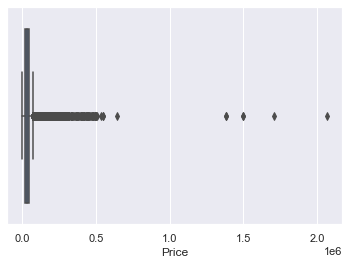

In [16]:
sns.boxplot(x=df['Price'])

<AxesSubplot:xlabel='HP'>

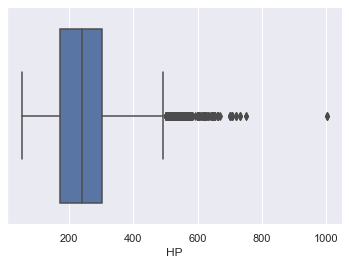

In [17]:
sns.boxplot(x=df['HP'])

<AxesSubplot:xlabel='Cylinders'>

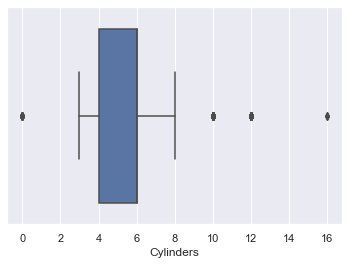

In [18]:
sns.boxplot(x=df['Cylinders'])

# Removing Outliers through IQR Score Technique

In [19]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

# finally we have 9191 rows after removing outliers

Year             9.0
HP             130.0
Cylinders        2.0
MPG-H            8.0
MPG-C            6.0
Price        21327.5
dtype: float64


<ipython-input-19-99ace845d4fb>:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
<ipython-input-19-99ace845d4fb>:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]


(9191, 10)

In [22]:
print(df['Make'].unique()) #different brands of cars

['BMW' 'Audi' 'FIAT' 'Chrysler' 'Nissan' 'Mazda' 'Mitsubishi' 'Alfa Romeo'
 'Toyota' 'Porsche' 'Volvo' 'Saab' 'GMC' 'Hyundai' 'Plymouth' 'Honda'
 'Oldsmobile' 'Suzuki' 'Ford' 'Kia' 'Chevrolet' 'Cadillac' 'Dodge'
 'Lincoln' 'Pontiac' 'Subaru' 'Volkswagen' 'Mercedes-Benz' 'Buick' 'Acura'
 'Land Rover' 'Lotus' 'Lexus' 'Infiniti' 'Scion' 'Genesis' 'Maserati'
 'HUMMER']


# Histogram of Number of Cars Manufactured by each Company

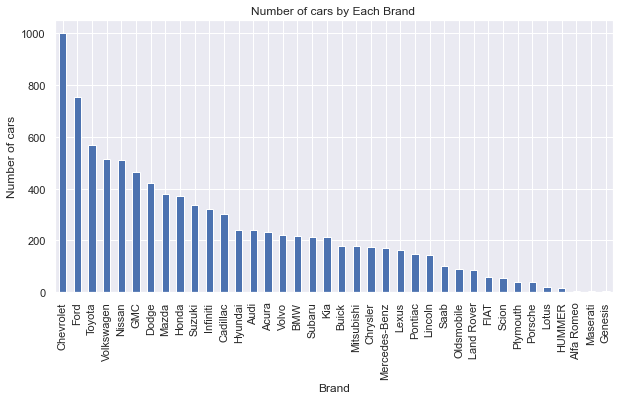

In [23]:
df.Make.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number of cars by Each Brand ")
plt.ylabel('Number of cars')
plt.xlabel('Brand'); #we can see that chevrolet and Ford are the major brands

# Correlation through Heat Maps

<AxesSubplot:>

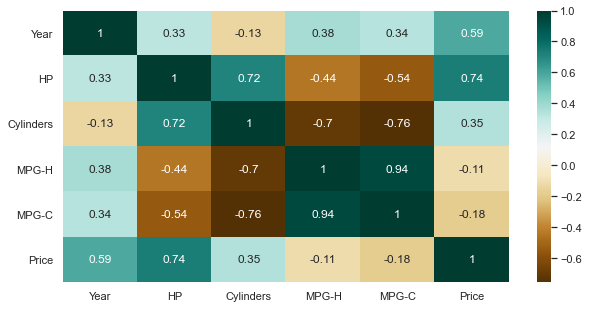

In [24]:
plt.figure(figsize=(10,5))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True) # we can see that the dependent variable has high correlation with Horsepower and Number of Cylinders

# scatterplot to understand the relationship between two variables

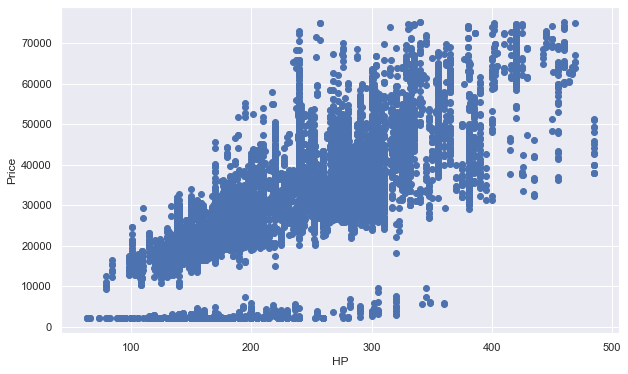

In [25]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['HP'], df['Price'])
ax.set_xlabel('HP')
ax.set_ylabel('Price')
plt.show() # we can clearly see a positive linear relationship between the Price and the HP of the cars